In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Calculate Speed Over Time for an Individual CSV File

average speed = 0.08205659429577705 
 standard deviation = 0.05922166244540886 
 range = 0.2980832669564745


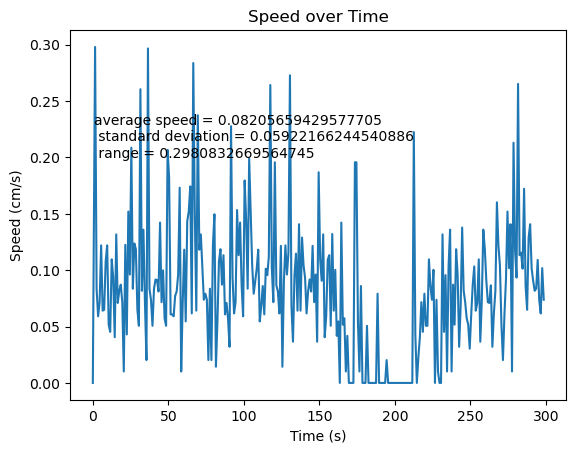

In [4]:
def speed_plot(file_path, sheet_name):
       
       df = pd.read_excel(file_path, sheet_name)
        
      # pixel to cm conversion 

       pixels_to_cm = 9 / 888
    
       # create a functions which calculate distance and time last point 

       def distance(x1, y1, x2, y2):
              distance_pixels = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
              distance_cm = distance_pixels * pixels_to_cm
              return distance_cm
        

       speed_list = [0, ]
       plot_time_list = [0, ]

       for i, row in df.iterrows():
             
             if i == df.index[-1]:
                  continue 

             x1 = row["X"]
             y1 = row["Y"]
             x2 = df.loc[i+1, "X"]
             y2 = df.loc[i+1, "Y"]

             value = distance(x1, y1, x2, y2)

             time1 = df.loc[i, "Frame"] 
             time2 = df.loc[i+1, "Frame"]

             time = time2 - time1

             speed = value / time
    
             speed_list.append(speed)

             plot_time = (time1 + time2) / 2

             plot_time_list.append(plot_time)
       
       def stats(speed_list):
             # find average speed
             avg_speed = np.average(speed_list)
             
             # find standard deviation
             std_speed = np.std(speed_list)
             
             # range
             min_speed = min(speed_list)
             max_speed = max(speed_list)
             range_speed = max_speed - min_speed
             
             return f"average speed = {avg_speed} \n standard deviation = {std_speed} \n range = {range_speed}"
       
       speed_stats = stats(speed_list)
       print(speed_stats)

       df["speed"] = speed_list

       df["time"] = plot_time_list

       
       plt.plot(df["time"], df["speed"])
       plt.xlabel('Time (s)')
       plt.ylabel('Speed (cm/s)')
       plt.title('Speed over Time')
       plt.text(1, 0.2, speed_stats)
       plt.show()

       

# want it to output the stats as well as the graph 
       # shd do the plt.annotate / text to add these to the graph? or indicate on graphs? 
       # if just finding average speed/ std and then range is this necessary all of this- might just want a box plot 
       # why cant i annotate 


speed_plot('/Users/cochral/Desktop/CSV_Pilot.xlsx', 'Random')

Descriptive Stats for Speed

In [ ]:

speed_per_condition = pd.DataFrame()


for subdir, dirs, files in os.walk('/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/Glued/manual-tracking'):


    # for every folder in the directory 

    for dir in dirs:
        dir_path = os.path.join(subdir, dir)


        # call function to calculate speed per file 
        # need a data frame which has the list of speeds per condition !!!!!
        
        
        def box_speed_repeat(dir_path):
            
            # the whole list of speeds from every file - 
            speed_list_csv = [ ]
            
            # Iterate over each file in the directory
            for filename in os.listdir(dir_path):
                
                
                # incase other items inside folder
                if filename.endswith('csv'):
                    
                    # Create the full path to the file 
                    file_path = os.path.join(dir_path, filename)
            
                    # read the csv file
                    df = pd.read_csv(file_path)

                    # pixel to cm conversion 
                    pixels_to_cm = 9 / 888
    
                    # create a functions which calculate distance and time last point 

                    def distance(x1, y1, x2, y2):
                       distance_pixels = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
                       distance_cm = distance_pixels * pixels_to_cm
                       return distance_cm
            
                    # creates a list of every speed accross the files
                    
                    for i, row in df.iterrows():
                       
                       
                       if i == df.index[-1]:
                          continue 
               
                       x1 = row["X"]
                       y1 = row["Y"]
                       x2 = df.loc[i+1, "X"]
                       y2 = df.loc[i+1, "Y"]

                       value = distance(x1, y1, x2, y2)

                       time1 = df.loc[i, "Frame"] 
                       time2 = df.loc[i+1, "Frame"]

                       time = time2 - time1

                       if (time == 0) | (value ==0):
                           speed = 0
                   
                    
                       else:
                          speed = value / time
                          
                        
                        
                       speed_list_csv.append(speed)

                return speed_list_csv
                       

            # need to assign the folder name with the speed list to the data frame 
                    
            
            speed_per_condition['dir'] = speed_list_csv
    



# now come out of the loop and use the dataframe to plot some data 

speed_per_condition

# chat gpt says to keep the functions outside - all called within a function which doesnt work !!! distance 
# also need to change the slice to frame in every file 

#ask michael why this didnt work - 


""


In [ ]:
# take functions out from the loop above (chatgpt says)


# distance function 

def distance(x1, y1, x2, y2):
    pixels_to_cm = 9 / 888
    distance_pixels = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    distance_cm = distance_pixels * pixels_to_cm
    return distance_cm


# function to calculate speed per file 


def box_speed_repeat(dir_path):

    # the whole list of speeds from every file - 
    speed_list_csv = [ ]
            
    # Iterate over each file in the directory
    for filename in os.listdir(dir_path):
            
            
            # incase other items inside folder
            if filename.endswith('csv'):
                
                # Create the full path to the file 
                file_path = os.path.join(dir_path, filename)
            
                # read the csv file
                df = pd.read_csv(file_path)

                    
                for i, row in df.iterrows():
                    
                    if i == df.index[-1]:
                          continue 
               
                    x1 = row["X"]
                    y1 = row["Y"]
                    x2 = df.loc[i+1, "X"]
                    y2 = df.loc[i+1, "Y"]

                    value = distance(x1, y1, x2, y2)

                    time1 = df.loc[i, "Frame"] 
                    time2 = df.loc[i+1, "Frame"]

                    time = time2 - time1

                    if (time == 0) | (value ==0):
                        speed = 0
                   
                    
                    else:
                        speed = value / time
                          
                        
                    speed_list_csv.append(speed)

    return speed_list_csv


# data frame to hold speed list per condition
speed_per_condition = pd.DataFrame()

for subdir, dirs, files in os.walk('/Volumes/lab-windingm/home/users/cochral/AttractionRig/Videos/Glued/manual-tracking'):
    
    for dir in dirs:

        dir_path = os.path.join(subdir, dir)
        
        speed_list = box_speed_repeat(dir_path)
        
        # speed_per_condition[dir] = speed_list this was used before and didnt work because there were different lengths of speed 

        # Assign the speed list to the DataFrame with the folder name as the column name
        # Use .loc to accommodate different lengths of speed lists
        # because loc is used and specifying all rows (:) with the column dir, Pandas will automatically handle the length of speed_list. 
        #If speed_list is shorter than the number of rows in the DataFrame, the remaining rows will be filled with NaN. If it's longer, the DataFrame will be extended to accommodate the new length.
        # The use of .loc and pd.Series ensures that the lists are correctly converted and aligned within the DataFrame, even if they have different lengths.


        speed_per_condition.loc[:, dir] = pd.Series(speed_list)



speed_per_condition


,Dead-5,Dead-4,Dead-3,Dead-2,Glue-1,Dead-1,Alive-1,Glue-2,Alive-2,Alive-3,Alive-4,Alive-5,Glue-3,Glue-4,plain,Glue-5
0,0.060811,0.073085,0.045326,0.109159,0.450073,0.093441,0.061650,0.041788,0.079158,0.093441,0.079158,0.150670,0.164988,0.160251,0.028666,0.391615
1,0.121622,0.067989,0.020270,0.064897,0.145113,0.123715,0.421553,0.051679,0.100333,0.087186,0.071666,0.073785,0.083576,0.188524,0.115558,0.086595
2,0.000000,0.059097,0.051679,0.000000,0.128200,0.095615,0.093441,0.118195,0.059097,0.146171,0.050676,0.143332,0.145113,0.122043,0.087186,0.123299
3,0.000000,0.051679,0.020270,0.125365,0.186883,0.101351,0.099820,0.060811,0.104348,0.103359,0.104348,0.081712,0.123715,0.145113,0.109628,0.115558
4,0.253378,0.060811,0.040541,0.083576,0.131757,0.113314,0.087186,0.115558,0.109159,0.096150,0.146171,0.123715,0.071666,0.123715,0.104348,0.061650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,0.167153,NaN,NaN,NaN,NaN,0.090651,0.020270,NaN,0.125365,0.087186,0.153372,0.040541,NaN,NaN,0.010135,NaN
2976,0.152027,NaN,NaN,NaN,NaN,0.050676,0.086595,NaN,0.000000,0.000000,0.103359,0.067989,NaN,NaN,0.087186,NaN
2977,0.192568,NaN,NaN,NaN,NaN,0.126993,0.059097,NaN,0.201177,0.073085,0.118629,0.067989,NaN,NaN,0.109628,NaN
2978,0.140802,NaN,NaN,NaN,NaN,0.113314,0.079158,NaN,0.169896,0.131757,0.150670,NaN,NaN,NaN,0.101351,NaN


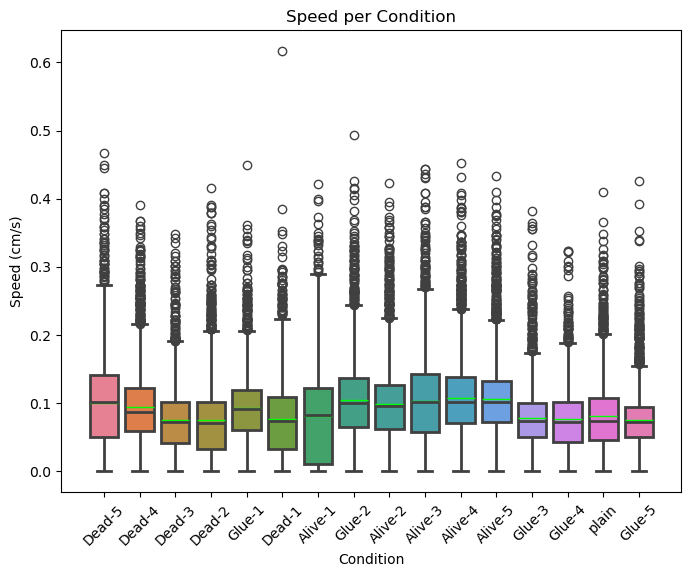

In [ ]:

# due to different size lengths of speeds per condition, Nans are present in the dataset
# following calculations should remove such 

# create a definition for a dataset whereby looped through the columns calculating average etc and then just plots box plot with all data 

def boxplot_speed_per_condition(dataframe):


    # Create a figure instance
    fig = plt.figure(1, figsize=(8, 6))

    sns.boxplot(data=dataframe, linewidth=2)

    plt.title('Speed per Condition')
    plt.ylabel('Speed (cm/s)')
    plt.xlabel('Condition')

    # the mean function in built ignores Nan  

    plt.plot(speed_per_condition.columns, speed_per_condition.mean().values, 'lime', marker='_', markersize=20, linestyle='None')

    # Improve layout
    plt.xticks(rotation=45)

    plt.show()


boxplot_speed_per_condition(speed_per_condition)



# need to inc avg for each column 
# order the box plot also 
    

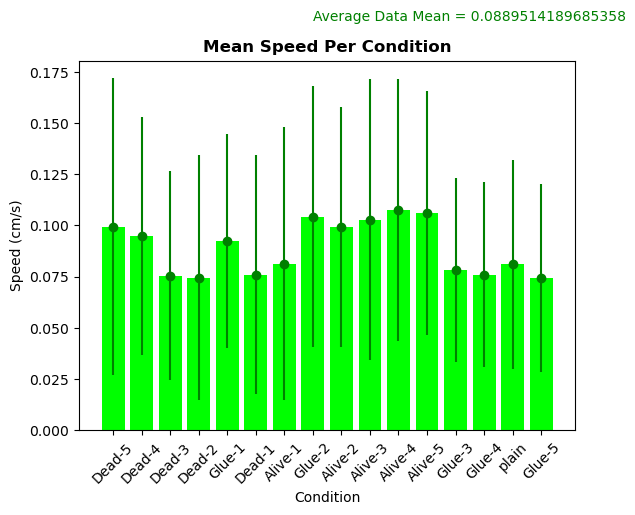

In [ ]:
def speed_bar_chart(dataframe):

    # why is values important here

    plt.bar(x=dataframe.columns, height=dataframe.mean().values, width = 0.8, align = 'center', color='lime')

    # surely there is an easier way

    for column in dataframe.columns:
        plt.errorbar(x=[column], y=[dataframe[column].mean()], yerr=[np.std(dataframe[column])], fmt='o', color='green', label=column)


    plt.xticks(rotation=45)

    plt.title('Mean Speed Per Condition', fontweight='bold')
    plt.xlabel('Condition')
    plt.ylabel('Speed (cm/s)')

    plt.text(7, 0.2, f"Average Data Mean = {dataframe.mean().mean()}", color='green')

    plt.show()


speed_bar_chart(speed_per_condition)